# Map projections and making your birthquake map [25 points]

Read Chapter 1.3 of the course web-book on map projections.

https://maggieavery.github.io/PyEarth_EPS88_jupyterbook/intro.html

## First make a copy of this notebook and rename it to EPS88_W1_FirstName_LastName

1. From 'File' choose 'Make a copy'
2. From 'File' chose 'Rename' and rename as described above

## Let's make your first map! [5 points]

We are going to use ```cartopy``` in conjunction with ```matplotlib``` to make maps. ```cartopy``` can transform points, lines and images into different map projections. ```matplotlib``` provides tools to visualize these projections. We will import them using the standard conventions. **You must press run (or more efficiently shift+enter) on the cell that imports these function libraries for the rest of the code to work.**

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

The syntax of using these functions takes some getting used to. Here we will make a figure, create an axis object with a defined projection, and then plot coastlines and a stock image that shows elevation.

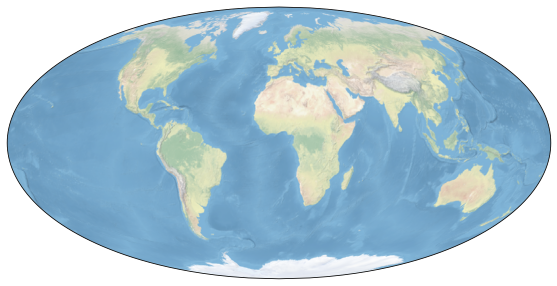

In [2]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

Let's plot the location of Berkeley on a map. First we want to assign the latitude (37.8715) and longitude (-122.2730) of Berkeley to variables:

In [3]:
Berkeley_latitude  = 37.8715
Berkeley_longitude = -122.2730

Now we can use the ```plt.scatter``` function to plot the location of Berkeley. ```scatter``` is just one of many plotting routines available in ```matplotlib```, the plotting library we imported above. You can learn about this function as well as others by typing ```matplotlib scatter``` into a searchh engine. We give the ```plt.scatter``` function ```Berkeley_longitude``` as the x-value, ```Berkeley_latitude``` as the y-value while also telling it to transform it into map coordinates (```transform=ccrs.PlateCarree()```) and to make the point red (```color='red'```). We can save the figure using ```plt.savefig()``` putting the name of the file with the extension within the ``()``. In this case, let's call it ```'Mollweide_projection_w_Berkeley.png'```

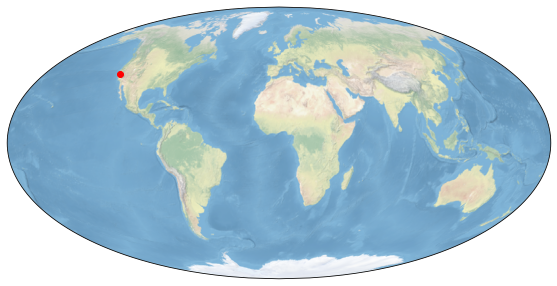

In [5]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.scatter(Berkeley_longitude ,Berkeley_latitude ,transform=ccrs.PlateCarree(), color='red')
plt.savefig('Mollweide_projection_w_Berkeley.png')

Review the plot and confirm that the plotted point is correct geographically.

Revisit your notebook from in class when you found your birthquake and enter the latitude of longitude in the cell below assigning them to ```birthquake_latitude``` and ```birthquake_longitude```.

In [6]:
birthquake_latitude  = 51.606
birthquake_longitude = 159.363

Now you can use the cell below to make a map that plots both Berkeley and your birthquake location as well as the shortest line between them. 

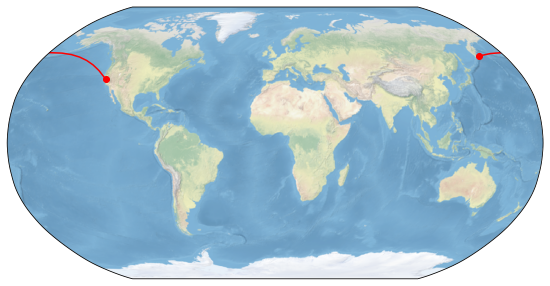

In [7]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()
plt.scatter([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.PlateCarree(), color='red')
plt.plot([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.Geodetic(), color='red')
plt.show()

## Test different map projections [5 points]


/Users/ddreger/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fa0b0554e00> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


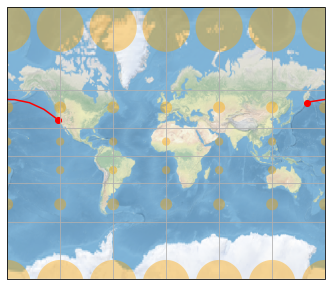

In [12]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())


ax.stock_img()
ax.gridlines()
plt.scatter([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.PlateCarree(), color='red')
plt.plot([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.Geodetic(), color='red')

# add equal area circles to see how they are distorted by the projection
ax.tissot(facecolor='orange', alpha=0.4) #alpha set the transparency

plt.show()

### In the cell below write code to examine different map projections. A list of possible `cartopy` projections is [here](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html).

/Users/ddreger/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fa0acf42b30> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


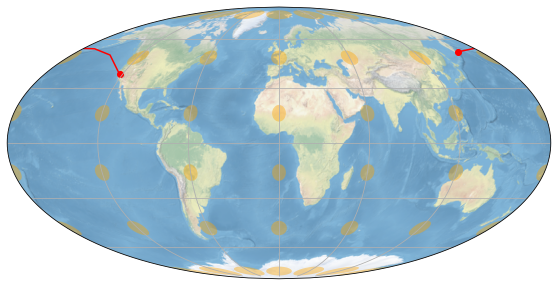

In [13]:
#Mollweide
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mollweide())

ax.stock_img()
ax.gridlines()
plt.scatter([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.PlateCarree(), color='red')
plt.plot([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.Geodetic(), color='red')

# add equal area circles to see how they are distorted by the projection
ax.tissot(facecolor='orange', alpha=0.4) #alpha set the transparency

plt.show()

/Users/ddreger/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fa0ad142b80> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


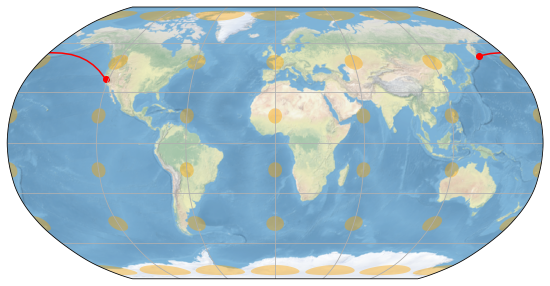

In [14]:
#Robinson
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())

ax.stock_img()
ax.gridlines()
plt.scatter([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.PlateCarree(), color='red')
plt.plot([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.Geodetic(), color='red')

# add equal area circles to see how they are distorted by the projection
ax.tissot(facecolor='orange', alpha=0.4) #alpha set the transparency

plt.show()

### Briefly describe in the cell below the advantages and disadvantages of the Mercator, Mollweide, and Robinson projections.

An advantage of the Mercator projection is that it makes the familiar "global map" presentation, but it has a clear disadvantage in that it is not an equal area projection. Landmasses are significantly deformed near the poles.

The Robinson projection has a wider range of latitude and longitude where equal area projection is made, but there is still significant distortion near the poles.

The Mollweide projection maintains fairly good equal area projection, thought there is elongation in the latitudinal direction, and the area of the poles becomes very small making it difficult to see details.

*I don't know if the students will plot the great circle lines, but if one does you can see a distorition of the great circle line in the Mollweide projection for the near polar path of the birthquake I used* Probably the most important thing to grade on here is the distortion of the equal area circles and how that is different in each projection.

## Make a map of 5 largest birthdate earthquakes [10 points]

Use the code cells below to make another map where you plot the locations of the 5 largest magnitude earthquakes that occured on the day you were born (use any projection you like). When you have made this map, save it as a .png file and submit your notebook to Ok. Choose any projection you want (https://scitools.org.uk/cartopy/docs/latest/crs/projections.html). You can see that the example above use Robinson and Mollweide. Note depending on the seismicity of the day you may have less than 5 events.

In [15]:
Codys_birthday = '1976-05-25'
day_after_Codys_birthday = '1976-05-26'
standard_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&orderby=magnitude'
Codys_birthquake_url = standard_url + '&starttime=' + Codys_birthday + '&endtime=' + day_after_Codys_birthday
Codys_birthday_earthquakes = pd.read_csv(Codys_birthquake_url)
eq_longitudes = Codys_birthday_earthquakes[:5]['longitude']
eq_latitudes = Codys_birthday_earthquakes[:5]['latitude']

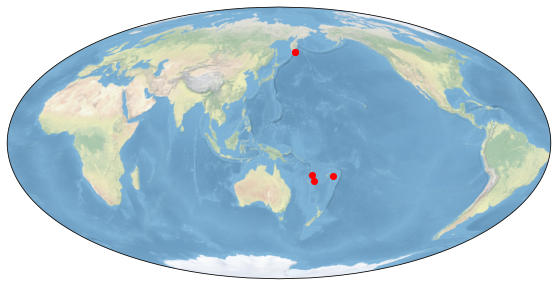

In [16]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=145))
ax.stock_img()
plt.scatter(eq_longitudes, eq_latitudes, transform=ccrs.PlateCarree(), color='red')
plt.savefig('Top5_birthquakes.png')

### Turn in this notebook

Save your completed notebook then:

1. From the 'File' pull down menu choose 'Download As'
2. Download as a PDF (.pdf)
3. Submit the pdf file, appropriately named to the bcourses assignment page by the due date